In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('main_data.csv', encoding='latin1')

# Display the first few rows of the dataset
print(df.head())



  Category                                           ShowName       Price  \
0      Men  Skechers Slip-ins: Max Cushioning AF - Fortuitous  \n120.00\n   
1      Men        Skechers Slip-ins: Max Cushioning AF - Game  \n120.00\n   
2      Men      Skechers Slip-ins: Max Cushioning Premier 2.0  \n110.00\n   
3      Men          Skechers Slip-ins: Max Cushioning Premier  \n110.00\n   
4      Men   Skechers Slip-ins: Max Cushioning - Advantageous  \n110.00\n   

     Code                                     Available Size  No of Size  \
0  220952  \n7.5\n \n8.0\n \n8.5\n \n9.0\n \n9.5\n \n10.0...          11   
1  220347            \n7.5\n \n8.0\n \n8.5\n \n9.0\n \n9.5\n           5   
2  220839  \n7.0\n \n7.5\n \n8.0\n \n8.5\n \n9.0\n \n9.5\...          12   
3  220313  \n7.5\n \n8.0\n \n8.5\n \n9.0\n \n9.5\n \n10.0...          11   
4  220389  \n7.5\n \n8.0\n \n8.5\n \n9.0\n \n9.5\n \n10.0...          11   

   No of Color review  Rating  
0          NaN      2     5.0  
1          4.0  

In [3]:
# Get general information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        238 non-null    object 
 1   ShowName        238 non-null    object 
 2   Price           238 non-null    object 
 3   Code            238 non-null    object 
 4   Available Size  234 non-null    object 
 5   No of Size      238 non-null    int64  
 6   No of Color     237 non-null    float64
 7   review          238 non-null    object 
 8   Rating          238 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 16.9+ KB
None


In [4]:
# Descriptive statistics
print(df.describe())

       No of Size  No of Color      Rating
count  238.000000   237.000000  238.000000
mean    12.403361     3.362869    3.992017
std      4.301544     1.912042    1.455930
min      0.000000     1.000000    0.000000
25%     10.000000     2.000000    4.065000
50%     12.000000     3.000000    4.550000
75%     15.000000     4.000000    4.700000
max     21.000000     9.000000    5.000000


C:\Users\hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


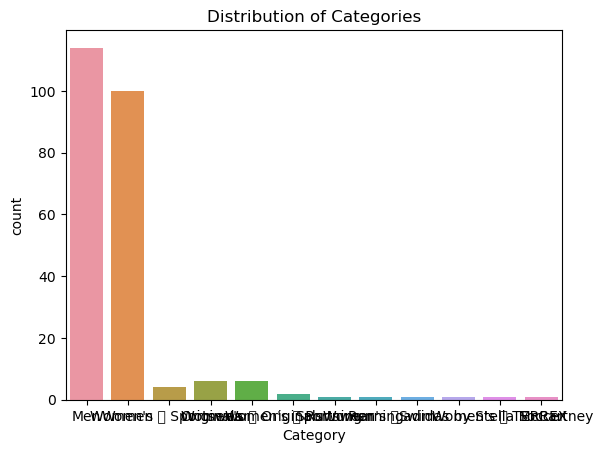

In [5]:
# 1. Univariate Analysis

# Categorical Variables

# Countplot for 'Category'
sns.countplot(x='Category', data=df)
plt.title('Distribution of Categories')
plt.show()

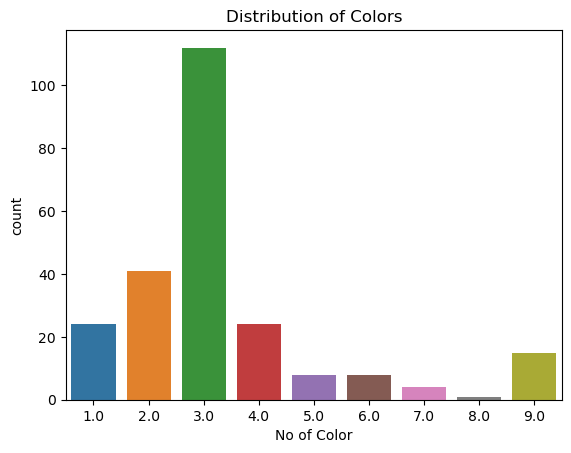

In [6]:
# Countplot for 'No of Color'
sns.countplot(x='No of Color', data=df)
plt.title('Distribution of Colors')
plt.show()

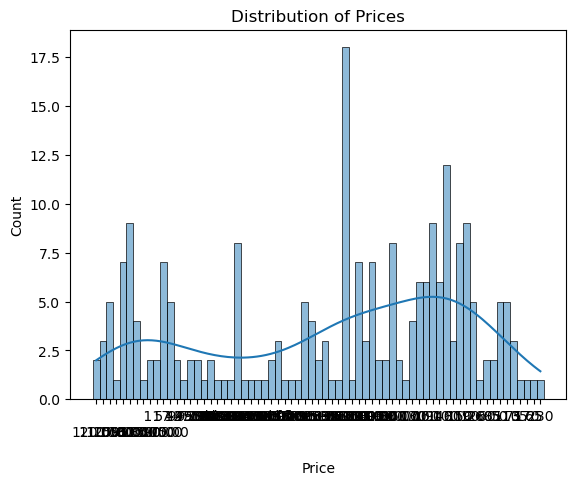

In [7]:
# Numerical Variables

# Distribution of 'Price'
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()

In [9]:
# Convert 'Price' to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', '').replace(',', ''), errors='coerce')

C:\Users\hp\AppData\Local\Temp\ipykernel_5064\1571314830.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$', '').replace(',', ''), errors='coerce')


C:\Users\hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


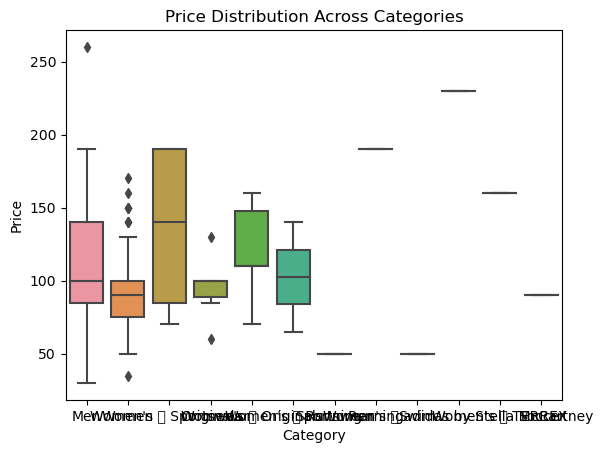

In [10]:
# 2. Bivariate Analysis

# Price vs. Category
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Price Distribution Across Categories')
plt.show()

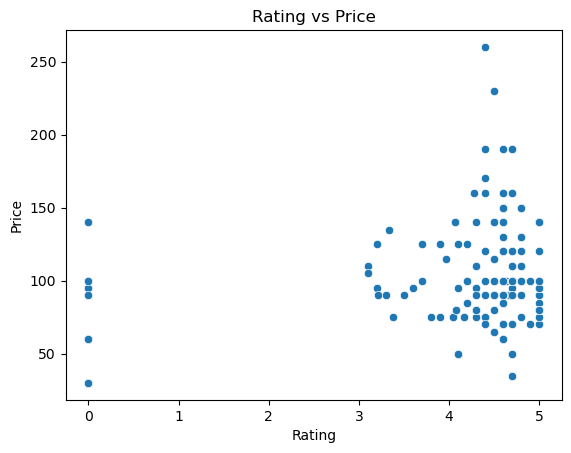

In [11]:
# Rating vs. Price
sns.scatterplot(x='Rating', y='Price', data=df)
plt.title('Rating vs Price')
plt.show()

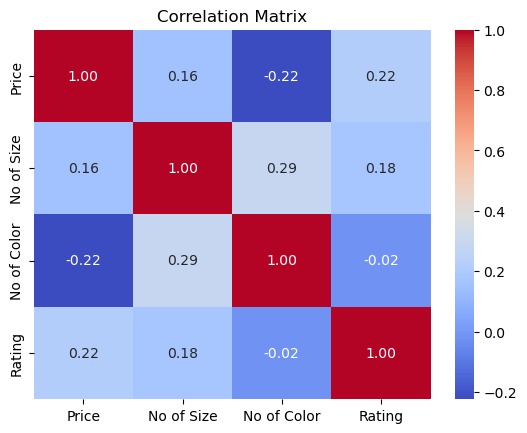

In [13]:
#Multivariate Analysis

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
import joblib

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
import joblib

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import joblib

# Load the data
df = pd.read_csv('main_data.csv', encoding='latin1')

# Separate features and target variable
X_price = df.drop(['Price'], axis=1)
y_price = df['Price']

# Identify numerical and categorical features
numerical_features = X_price.select_dtypes(include=['number']).columns
categorical_features = X_price.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with a constant
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
pipeline_price = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [45]:
# Split the data into training and testing sets
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2, random_state=42)



In [46]:
# Train the model
pipeline_price.fit(X_price_train, y_price_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['No of Size', 'No of Color', 'Rating'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                

In [47]:
# Make predictions on the test set
y_price_pred = pipeline_price.predict(X_price_test)

# Save the model
joblib.dump(pipeline_price, 'model_price.pkl')

['model_price.pkl']

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, accuracy_score
import joblib

# Load the data
df = pd.read_csv('main_data.csv', encoding='latin1')

# Convert 'Price' column to numeric, handling errors by coercing to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Rating' column to numeric, handling errors by coercing to NaN
df['Rating'] = df['Rating'].astype(str).str.extract('(\d+)')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Separate features and target variables
X_price = df.drop(['Price', 'Rating'], axis=1)
y_price = df['Price']

X_rating = df.drop(['Rating', 'Price'], axis=1)
y_rating = df['Rating']

# Identify numerical and categorical features
numerical_features = X_price.select_dtypes(include=['number']).columns
categorical_features = X_price.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with a constant
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor using ColumnTransformer
preprocessor_price = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor_rating = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline for price prediction
pipeline_price = Pipeline(steps=[
    ('preprocessor', preprocessor_price),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Create pipeline for star rating prediction
pipeline_rating = Pipeline(steps=[
    ('preprocessor', preprocessor_rating),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets for price prediction
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Split the data into training and testing sets for star rating prediction
X_rating_train, X_rating_test, y_rating_train, y_rating_test = train_test_split(X_rating, y_rating, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV for price prediction
param_grid_price = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
}

grid_search_price = GridSearchCV(pipeline_price, param_grid=param_grid_price, cv=5, scoring='neg_mean_squared_error')
grid_search_price.fit(X_price_train, y_price_train)

# Hyperparameter tuning using GridSearchCV for star rating prediction
param_grid_rating = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
}

grid_search_rating = GridSearchCV(pipeline_rating, param_grid=param_grid_rating, cv=5, scoring='accuracy')
grid_search_rating.fit(X_rating_train, y_rating_train)

# Make predictions on the test sets
y_price_pred = grid_search_price.predict(X_price_test)
y_rating_pred = grid_search_rating.predict(X_rating_test)

# Evaluate models
mse_price = mean_squared_error(y_price_test, y_price_pred)
accuracy_rating = accuracy_score(y_rating_test, y_rating_pred)

# Save the best models
best_model_price = grid_search_price.best_estimator_
best_model_rating = grid_search_rating.best_estimator_

joblib.dump(best_model_price, 'model_price.pkl')
joblib.dump(best_model_rating, 'model_rating.pkl')

# Print evaluation metrics
print(f'Mean Squared Error for Price Prediction: {mse_price}')
print(f'Accuracy for Star Rating Prediction: {accuracy_rating}')

# Print the best hyperparameters
print('Best hyperparameters for Price Prediction:', grid_search_price.best_params_)
print('Best hyperparameters for Star Rating Prediction:', grid_search_rating.best_params_)


Mean Squared Error for Price Prediction: 3283012.6159434435
Accuracy for Star Rating Prediction: 0.8333333333333334
Best hyperparameters for Price Prediction: {'regressor__max_depth': 10, 'regressor__n_estimators': 50}
Best hyperparameters for Star Rating Prediction: {'classifier__max_depth': None, 'classifier__n_estimators': 150}
